# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers

In [3]:
# 1.Load Data
dataset = pd.read_csv("archive_1/creditcard.csv")

In [4]:
# 2.Check Missing Values 
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
train_size = int(dataset.shape[0] * 0.5)
test_size = int((dataset.shape[0] * 0.3) + train_size)

y = dataset["Class"]
x = dataset.drop("Class", axis=1)

#4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

x_train, x_test, x_validate = x[:train_size], x[train_size:test_size], x[test_size:]
y_train, y_test, y_validate = y[:train_size], y[train_size:test_size], y[test_size:]

In [6]:
# 3.Standardized the Input Variables.

mean = x_train.mean()
x_train -= mean
std  = x_train.std()
x_train /= std

x_test -= mean
x_test /= std
x_validate -= mean
x_validate /= std

In [7]:
# 5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(30, input_shape=(30,), activation="relu"))
    model.add(layers.Dense(10, activation="relu"))
    model.add(layers.Dense(8, activation="relu"))
    model.add(layers.Dense(3, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
#     6.Compilation Step
    model.compile(metrics=["accuracy"], loss='binary_crossentropy', optimizer="rmsprop")
    
    return model

model = build_model()

In [9]:
# 7.Train the Model with Epochs (100).
history = model.fit(x_train, y_train, validation_data=(x_validate, y_validate), epochs=20, shuffle=True, batch_size=64)

Epoch 1/20
2226/2226 [==============================] - 3s 1ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0059 - val_accuracy: 0.9994
Epoch 2/20
2226/2226 [==============================] - 3s 1ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 3/20
2226/2226 [==============================] - 3s 1ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 4/20
2226/2226 [==============================] - 3s 1ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 5/20
2226/2226 [==============================] - 3s 1ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0056 - val_accuracy: 0.9994
Epoch 6/20
2226/2226 [==============================] - 3s 1ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9995
Epoch 7/20
2226/2226 [==============================] - 3s 1ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy:

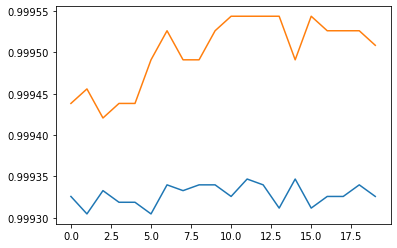

In [11]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.plot(range(20), accuracy)
plt.plot(range(20), val_accuracy)
plt.show()


In [13]:
score = model.evaluate(x_test, y_test, batch_size=128)
print('\nAnd the Score is {:.0%}'.format(score[1]))
# 9.Prediction should be > 92%

668/668 [==============================] - 1s 851us/step - loss: 0.0139 - accuracy: 0.9978

And the Score is 100%


In [14]:
# 11Prediction
data_to_predict = x_test.to_numpy()[0]
data_to_predict = data_to_predict.reshape((-1, 30))
prediction = model.predict([np.array(data_to_predict)])

In [15]:
print("Predicted Value:", prediction)

Predicted Value: [[1.6908714e-05]]
